
<div>
    <div style="background-color : pink">
    <h1 style="margin: auto; padding: 30px;color: #fff">
            Projet 10 - Détecter des faux billets 
        </h1>
    </div> 
    


<div>
    <div style="background-color : fff">
    <h1 style="text-align: center; padding: 30px;color: pink">
            Analyse préliminaire des données 
        </h1>
    </div> 

<div>
    <h3 style="margin: auto; padding: 10px; color: pink;margin-left: 4.5em; text-indent: -4.5em">Ce programme est organisé en plusieurs partie :
        </h3>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 4.5em; text-indent: -4.5em">
            <lu>
                <li><a href="#Mission">Mission projet 10 </a></li>
                <li><a href="#partie1">Partie 1</a> : Librairies et fonction</li>
                <li><i> 1.1 - Importation des librairies</i></li>
                <li><i> 1.2 - Définition d'une fonction</i></li>
                <li><a href="#partie2">Partie 2</a> : Importation et visualisation des données </li>
                <li><a href="#partie3">Partie 3</a> : Distibution des variable</li>
                <li><a href="#partie4">Partie 4</a> : Répartion des billets Vrai/Faux</li>
                <li><a href="#partie5">Partie 5</a> : Test loi normale</li>
                <li><a href="#partie6">Partie 6</a> : Distibution bivariée</li>
                 <li><a href="#partie7">Partie 7</a> : Matrice des corrélations</li>
                <li><a href="#Conclusion">Conclusion</a></li>
           </lu>
        </div>
    </div>
</div>

<div>
    <div style="background-color: pink;" id="Mission">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Mission projet 10
        </h2>
        <font size="-0"><a href="#contexte">  🔝  </a></font>
    </div>
</div>


### Consultant Data Analyst, cette mission a pour objectif de mettre en place des méthodes d’identification des contrefaçons des billets en euros, en mettant en place une modélisation qui serait capable d’identifier automatiquement les vrais des faux billets, à partir de certaines dimensions du billet et des éléments qui le composent.

---
## <font color=pink> Lexique des données </font>

<font> - Dimensions exprimées en mm </font>
 
* is_genuine : Indique si le billet est vrai (True) ou faux (False)
* diagonal : la diagonale du billet 
* height_left : la hauteur côté gauche du billet 
* height_right : La hauteur côté droit du billet 
* margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci 
* margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci
* length : la longueur du billet 



---
<div>
    <div style="background-color: pink;" id="partie1">
        <h2 style="margin: auto; padding: 20px; color: #fff; margin-left: 4.5em; text-indent: -4.5em">
            Partie 1 - Librairies et fonctions
        </h2>
        <lu>
                <li><i> 1.1 - Importation des librairies</i></li>
                <li><i> 1.2 - Définition d'une fonction</i></li>
            <lu>
                <div>
                    <div>
                        <div>
                   

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            1.1 - Importation des librairies 
        </h3>
    </div>
             

In [1]:
# importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import scipy.stats as st
from scipy.stats import shapiro


<div>
        <h3 style="margin: auto; padding: 10px; color: pink;margin-left: 4.5em; text-indent: -4.5em">
            1.2 - Définition d'une fonction
        </h3>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>


#### <font> Cette fonction : </font>
*  Calcul le nombre de ligne et de colonne
*  Donne le type des données
*  Calcul des données statistiques descriptives (nombre, valeurs uniques, moyenne, écart type, valeur mini/maxi etc...)
*  Affiche les 5 premières lignes de notre dataFrame
*  Détecte une éventuelle clé primaire
*  Indique le nombre de valeurs manquantes ainsi que les doublons


In [2]:
# Définition de la fonction "analyseDataFrame"
def analyseDataFrame(df):
    """Fonction qui prend en arguments un dataframe pour analyse."""

    name =[x for x in globals() if globals()[x] is df][0]
    print("La dimension de DataFrame « " + name  +" » : " + str(df.shape) + " (lignes, colonnes)\n")
    display(temp_var = df.info())
    display(df.describe().T)
    display(df.head(5))
    
    # Afficher les colonnes qui sont unique dans le DataFrame df
    print("Test d'unicité sur les colonnes de DataFrame :")
    test_unicite = 0
    for col in df.columns :
        if df[col].size == df.drop_duplicates(col)[col].size :
          display(f'« {col:s} » est unique, et pourrait être une clé primaire.')
          test_unicite = 1
    if test_unicite == 0 :
        print("Il n'y a pas d'unicité dans aucune colonne. Il n'y a pas de clé primaire")

    print("Compter les nulles pour chaque colonne :")
    display(df.isnull().sum())
    
    print("Compter les duplicates:")
    display(df.duplicated().sum())
    

<div>
    <div style="background-color: pink;" id="partie2">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 2 - Importation et visualisation des données
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

In [3]:
# Importation du fichier CSV
Df_Billets = pd.read_csv("billets.csv", sep=";")  

# Visualisation du dataFrame
analyseDataFrame(Df_Billets) 


La dimension de DataFrame « Df_Billets » : (1500, 7) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


Test d'unicité sur les colonnes de DataFrame :
Il n'y a pas d'unicité dans aucune colonne. Il n'y a pas de clé primaire
Compter les nulles pour chaque colonne :


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Compter les duplicates:


0

<div>
    <div style="background-color: pink;" id="partie3">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 3 - Distribution des variables
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>
         

### Avec la distribution des variables nous allons pouvoir visualiser l'ensemble des valeurs et des associations présentent dans le dataFrame.

In [4]:
# Donne les catégories présente dans la variable "is_genuine"
Df_Billets["is_genuine"].unique()


array([ True, False])

Nombre total de billets: 1500


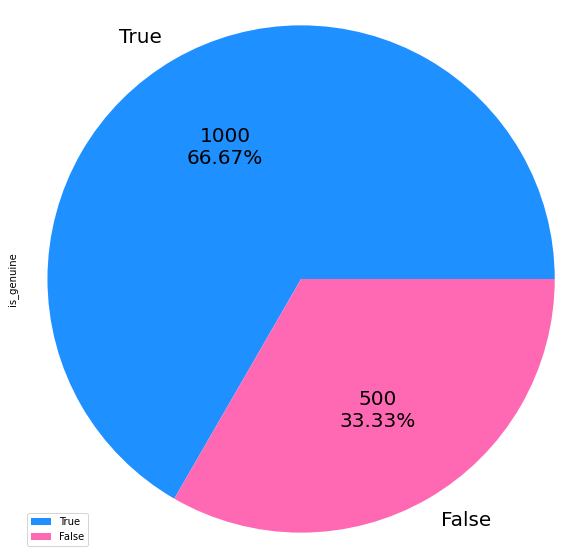

In [5]:
# Visualisation de la distribution de la variable "is_genuine"
Df_VraiFaux = Df_Billets["is_genuine"]
nbr_VraiFaux = len(Df_VraiFaux)
print("Nombre total de billets:", nbr_VraiFaux)

plt.figure(figsize=(10,10))
Df_Billets.is_genuine.value_counts(normalize = True).plot(kind="pie", 
                                                   autopct = lambda x: f"{x / 100 * nbr_VraiFaux:.0f}\n"+str(round(x, 2)) + "%"
                                                   , textprops={"fontsize": 20}
                                                   , colors= ["dodgerblue", "hotpink"])


plt.legend()
plt.axis("equal")
plt.show()


<Figure size 432x288 with 0 Axes>

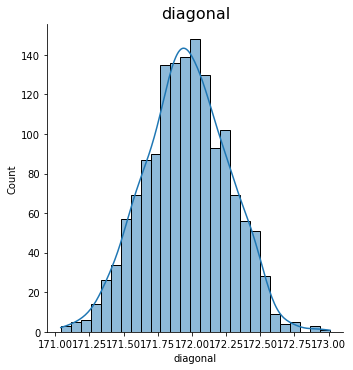

<Figure size 432x288 with 0 Axes>

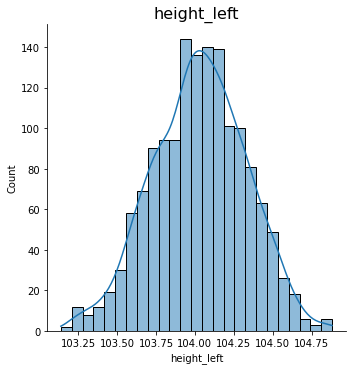

<Figure size 432x288 with 0 Axes>

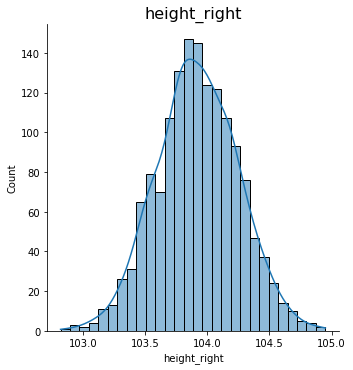

<Figure size 432x288 with 0 Axes>

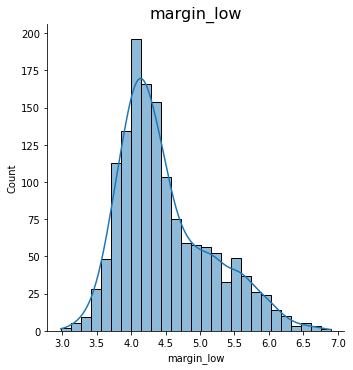

<Figure size 432x288 with 0 Axes>

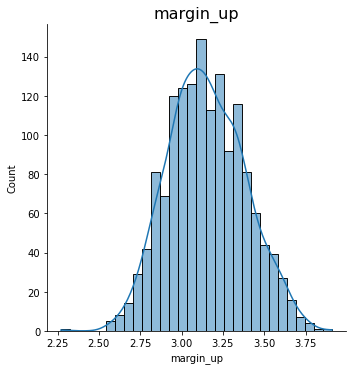

<Figure size 432x288 with 0 Axes>

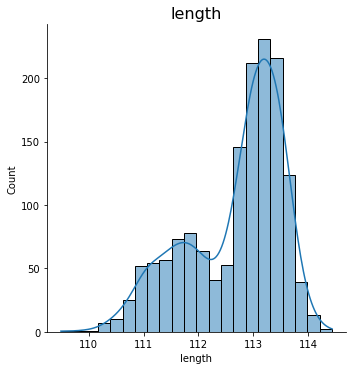

In [6]:
# Visualisation des variables de type "float"
for col in Df_Billets.select_dtypes("float"):
    plt.figure()
    sns.displot(Df_Billets[col], kde=True)
    plt.title(col, fontsize=16)
    plt.show()
    

<div>
    <div style="background-color: pink;" id="partie4">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 4 - Répartition des billets vrai/faux
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

In [7]:
# Création d'un dataFrame avec uniquement les vrais billets
Df_Vrai = Df_Billets[Df_Billets["is_genuine"] == True]

Df_Vrai.head()


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [8]:
# Création d'un dataFrame avec uniquement les faux billets
Df_Faux = Df_Billets[Df_Billets["is_genuine"] == False]

Df_Faux.head()


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1000,False,172.28,103.95,103.91,4.78,3.31,111.40
1001,False,171.92,103.86,104.30,4.96,3.13,111.29
1002,False,171.59,104.14,104.38,4.97,3.47,111.22
1003,False,172.02,104.33,104.33,5.19,3.21,111.99
1004,False,172.55,104.25,104.23,5.60,3.13,111.72


<div>
    <div style="background-color: pink;" id="partie5">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 5 - Test loi normale
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

### Le test de normalité permet de vérifier si nos données suivent une loi dite normal ou non. Shapiro-Wilk est un test appliquable pour des  échantillons allant jusqu'à 5000 valeurs.

In [9]:
# Article pour interpretation de résultat 'stat' ou 'W'

# test de normalité shapiro-Wilk (loi normal)
# H0 : l'échantillon suit une loi normal / l'echantillon a une distribution Gaussienne
# H1 : hypothèse alternative

print("Premier test shapiro-Wilk -----------------------------------------------------------")

print("Deuxième test shapiro-Wilk -----------------------------------------------------------")
df_name = "height_left"

stat, p_value = st.shapiro(Df_Billets["height_left"])
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print(f"L'échantillon {df_name} semble avoir une distribution Gaussienne (ne pas rejeter H0)")
else:
    print(f"L'échantillon {df_name} ne semble pas avoir une distribution Gaussienne (rejeter H0)")
print()

# Interprétation : si la valeur-p est inférieure à une seuil α qu’on s’est donné (en général, 5%),
# alors on rejette H0.

print("Troisième test shapiro-Wilk -----------------------------------------------------------")
df_name = "height_right"

stat, p_value = st.shapiro(Df_Billets["height_right"])
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print(f"L'échantillon {df_name} semble avoir une distribution Gaussienne (ne pas rejeter H0)")
else:
    print(f"L'échantillon {df_name} ne semble pas avoir une distribution Gaussienne (rejeter H0)")
print()

# Interprétation : si la valeur-p est inférieure à une seuil α qu’on s’est donné (en général, 5%),
# alors on rejette H0.

print("Quatrième test shapiro-Wilk -----------------------------------------------------------")
df_name = "margin_low"

stat, p_value = st.shapiro(Df_Billets["margin_low"])
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print(f"L'échantillon {df_name} semble avoir une distribution Gaussienne (ne pas rejeter H0)")
else:
    print(f"L'échantillon {df_name} ne semble pas avoir une distribution Gaussienne (rejeter H0)")
print()

# Interprétation : si la valeur-p est inférieure à une seuil α qu’on s’est donné (en général, 5%),
# alors on rejette H0.

print("Cinquième test shapiro-Wilk -----------------------------------------------------------")
df_name = "margin_up"

stat, p_value = st.shapiro(Df_Billets["margin_up"])
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print(f"L'échantillon {df_name} semble avoir une distribution Gaussienne (ne pas rejeter H0)")
else:
    print(f"L'échantillon {df_name} ne semble pas avoir une distribution Gaussienne (rejeter H0)")
print()

# Interprétation : si la valeur-p est inférieure à une seuil α qu’on s’est donné (en général, 5%),
# alors on rejette H0.

print("Sixième test shapiro-Wilk -----------------------------------------------------------")
df_name = "length"

stat, p_value = st.shapiro(Df_Billets["length"])
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print(f"L'échantillon {df_name} semble avoir une distribution Gaussienne (ne pas rejeter H0)")
else:
    print(f"L'échantillon {df_name} ne semble pas avoir une distribution Gaussienne (rejeter H0)")
print()

# Interprétation : si la valeur-p est inférieure à une seuil α qu’on s’est donné (en général, 5%),
# alors on rejette H0.



Premier test shapiro-Wilk -----------------------------------------------------------
Deuxième test shapiro-Wilk -----------------------------------------------------------
Statistics=0.998, p=0.052
L'échantillon height_left semble avoir une distribution Gaussienne (ne pas rejeter H0)

Troisième test shapiro-Wilk -----------------------------------------------------------
Statistics=1.000, p=0.981
L'échantillon height_right semble avoir une distribution Gaussienne (ne pas rejeter H0)

Quatrième test shapiro-Wilk -----------------------------------------------------------
Statistics=nan, p=1.000
L'échantillon margin_low semble avoir une distribution Gaussienne (ne pas rejeter H0)

Cinquième test shapiro-Wilk -----------------------------------------------------------
Statistics=0.996, p=0.001
L'échantillon margin_up ne semble pas avoir une distribution Gaussienne (rejeter H0)

Sixième test shapiro-Wilk -----------------------------------------------------------
Statistics=0.918, p=0.000

<div>
    <div style="background-color: pink;" id="partie6">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 6 - Distribution bivariée
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

### L'analyse bivariée nous permet d'établir la relation entre deux variables. Il existe trois types d'analyse bivariée(Numérique-Numérique, Catégorique_Catégorique, Numérique-Catégorique).

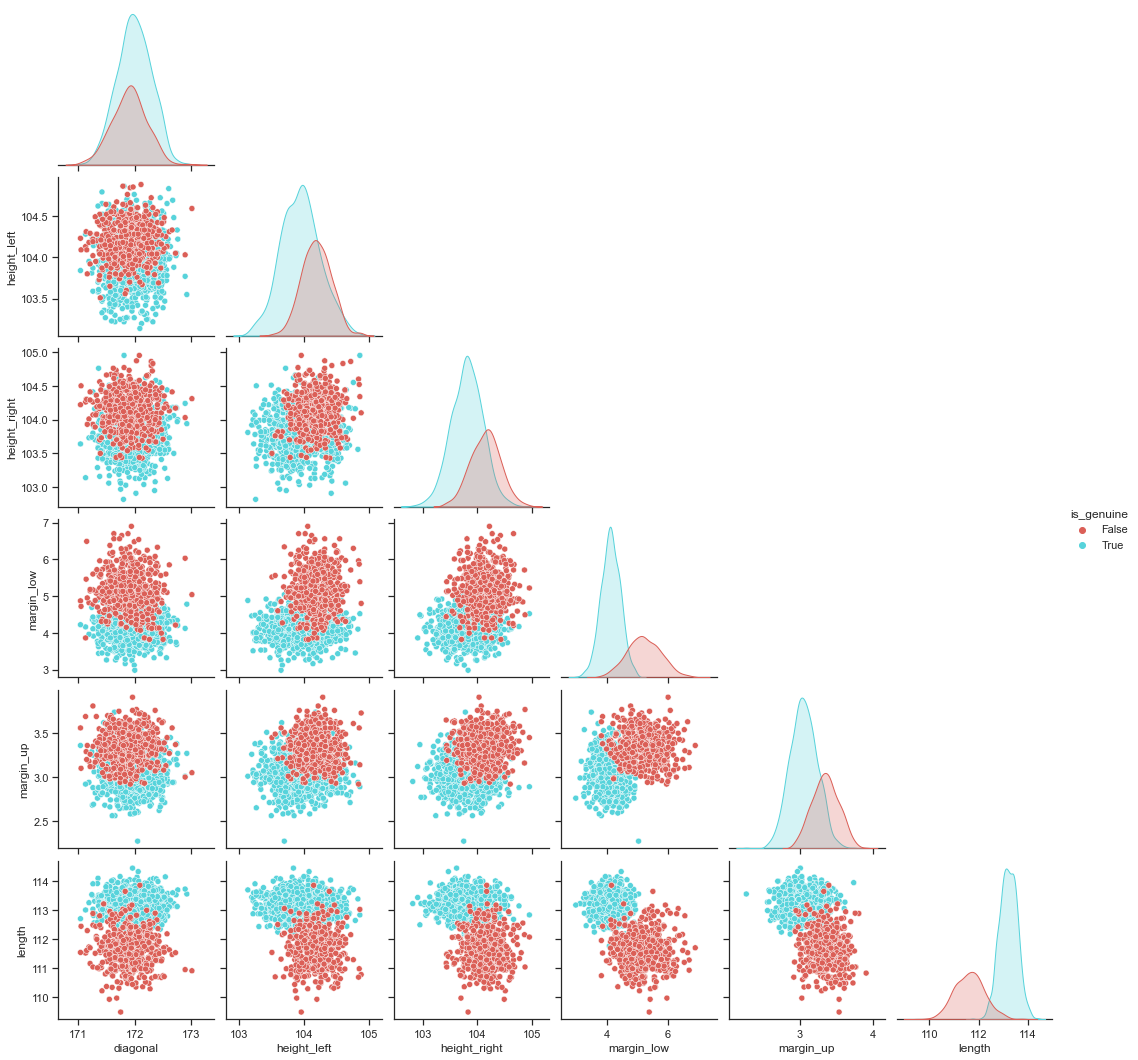

In [10]:
# Visualisation des variables (Numérique-Catégorique) avec pairplot
sns.set(style="ticks")
sns.pairplot(data=Df_Billets, hue="is_genuine", palette= "hls", corner=True)
plt.show()


In [11]:
# Attribution de la colonne "is_genuine" en tant qu'index de ligne
Df_Billets.set_index("is_genuine", inplace=True)

# Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
billets_CR_df = Df_Billets.sub(Df_Billets.mean())
print("Means : \n",Df_Billets.mean())
print()

# Divisé les valeurs de la dataframe par l'écart-type de chaque colonne
billets_CR_df = billets_CR_df.div(Df_Billets.std()) 
print("Ecart-type : \n",Df_Billets.std() )


Means : 
 diagonal        171.958440
height_left     104.029533
height_right    103.920307
margin_low        4.485967
margin_up         3.151473
length          112.678500
dtype: float64

Ecart-type : 
 diagonal        0.305195
height_left     0.299462
height_right    0.325627
margin_low      0.663813
margin_up       0.231813
length          0.872730
dtype: float64


diagonal
height_left
height_right
margin_low
margin_up
length


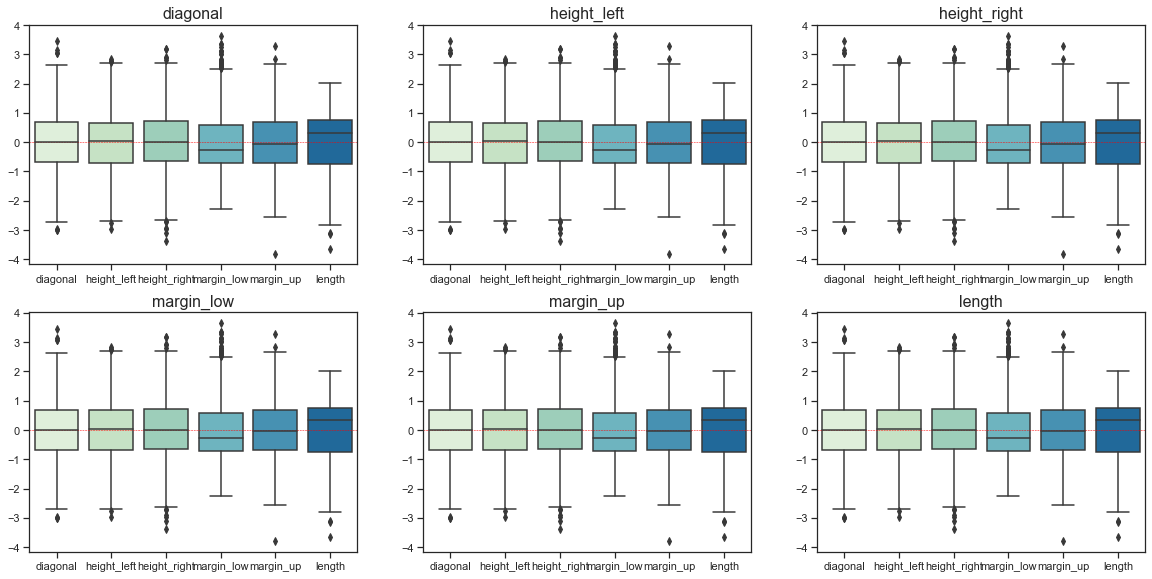

In [12]:
# Visualisationdes des variables (Numérique-Numérique) avec graphique Boxplot 
liste_var = Df_Billets.columns

fig = plt.figure(figsize=(20,15),constrained_layout=False)
i = 331

for var in liste_var :
    print(var)
    ax = fig.add_subplot(i)
    sns.boxplot(data=billets_CR_df,
                palette ="GnBu").set(
                                        xlabel='', 
                                        ylabel=''
                                    )
    ax.axhline(y = 0.0, color ="red", linestyle ="--", linewidth=0.5) 
    _ = plt.title(var, fontsize=16)
    i+=1
    

<div>
    <div style="background-color: pink;" id="partie7">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 7 - Matrice des corrélations
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

### La matrice d corrélation est utiliser pour évaluer la dépendence entre plusieurs variables en même temps.

In [13]:
# Génère la matrice des corrélations
Matrice_Corr = Df_Billets.corr(method="pearson")
Matrice_Corr


,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


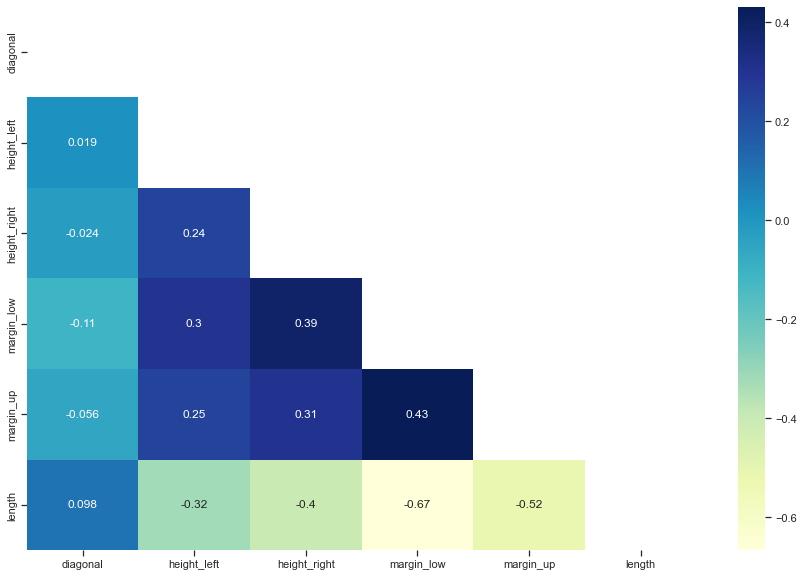

In [14]:
# Visualisation avec triangle de corrélations
mask = np.triu(np.ones_like(Matrice_Corr, dtype=np.bool_))
plt.figure(figsize=(15, 10))
sns.heatmap(Matrice_Corr, mask=mask, annot=True, cmap="YlGnBu")
plt.show()


<div>
    <div style="background-color: pink;" id="Conclusion">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Conclusion
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

### Le dataFrame est composé de 1500 lignes et de 7 colonnes, il ne présente pas de duplicatas,  il y 37 valeurs manquantes concernant la variables "margin_low, qui seront traitées dans un autre notebook.

### Les test de normalité Shapiro-Wilk révèle que les variables "height_left, height_right, margin_low" semble présenter une distribution dite Gaussienne(normale), tandis que les variables "margin_up, length" ne semble pas avoir une distribution normale, les variables length, margin_up et margin_low semble être des variables significatives.

### Il y a une forte corrélation entre les variables margin_low et  margin_up ainsi qu'entre les variables height_right et margin_low .